# Importing Libraries and Dataset

In [28]:
import numpy as np
import pandas as pd
import os
import csv

import matplotlib.pyplot as plt
import seaborn as sns


from textblob import TextBlob

from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense

import xgboost as xgb
from lightgbm import LGBMClassifier,plot_importance


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1.Data Collection

In [2]:


folder_path = "./Data/edmunsons"

# List all files in the directory
files_path = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

cars_data = pd.DataFrame()

for i in files_path:
    j = i.replace(".csv", "")
    pull_path=folder_path+"/"+i
    with open(pull_path, 'r', encoding='utf-8', errors='ignore') as file:
        globals()[j] = pd.read_csv(file)
    cars_data=pd.concat([cars_data,globals()[j]])
    print(i)
    print("individual file length:")
    print(len(globals()[j]))
    print("combined file length:")
    print(len(cars_data))

Scraped_Car_Review_dodge.csv
individual file length:
11552
combined file length:
11552
Scraped_Car_Review_ferrari.csv
individual file length:
260
combined file length:
11812
Scraped_Car_Review_fiat.csv
individual file length:
395
combined file length:
12207
Scraped_Car_Review_ford.csv
individual file length:
26791
combined file length:
38998
Scraped_Car_Review_genesis.csv
individual file length:
78
combined file length:
39076
Scraped_Car_Review_hummer.csv
individual file length:
781
combined file length:
39857
Scraped_Car_Review_hyundai.csv
individual file length:
9361
combined file length:
49218
Scraped_Car_Review_infiniti.csv
individual file length:
5270
combined file length:
54488
Scraped_Car_Review_isuzu.csv
individual file length:
1962
combined file length:
56450
Scraped_Car_Review_jaguar.csv
individual file length:
2477
combined file length:
58927
Scraped_Car_Review_jeep.csv
individual file length:
5334
combined file length:
64261
Scraped_Car_Review_kia.csv
individual file length

In [3]:
cars_data.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \nroom. ...",5.000
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875


In [4]:
cars_data.columns=["id","date","Author_name","vehicle","rev_title","review","rating"]
cars_data.head()

,id,date,Author_name,vehicle,rev_title,review,rating
0,0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625
1,1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125
2,2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \nroom. ...",5.000
3,3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500
4,4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875


In [5]:
cars_data['vehicle'].nunique()

29128

In [6]:
cars_data['brand']=cars_data["vehicle"].str.split().str[1]
cars_data['model'] =cars_data['vehicle'].str.split(' ').str[2:].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
cars_data['year']=cars_data["vehicle"].str.split().str[0]
cars_data.drop(columns=["vehicle","date","rev_title"],inplace=True)


In [7]:
cars_data.head()

,id,Author_name,review,rating,brand,model,year
0,0,roadking,It's been a great delivery vehicle for my caf...,4.625,Dodge,Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A),2002
1,1,Mark,Bought this car as a commuter vehicle for a v...,2.125,Dodge,Ram Cargo Van 3500 3dr Ext Van (5.2L 8cyl 4A),2002
2,2,Tom Sheer,"This van rocks its the best, lots of \nroom. ...",5.000,Dodge,Ram Cargo Van 3500 Maxi 3dr Ext Van (5.2L 8cyl...,2002
3,3,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500,Dodge,Ram Cargo Van 2500 Maxi 3dr Ext Van (5.2L 8cyl...,2001
4,4,VanMan,Good solid frame and suspension. Well equipp...,2.875,Dodge,Ram Cargo Van 1500 3dr Van (3.9L 6cyl 3A),2001


In [8]:
cars_data['brand'].unique()

array(['Dodge', nan, 'Ferrari', 'FIAT', 'Ford', 'Genesis', 'HUMMER',
       'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce',
       'Subaru', 'Suzuki', 'Tesla', 'Volvo', 'Acura', 'Alfa', 'AM',
       'Aston', 'Audi', 'Bentley', 'BMW', 'GMC', 'Honda', 'Toyota',
       'Volkswagen', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler'], dtype=object)

# 2.Data Visualization

In [9]:
cars_data.describe()

,rating
count,215387.000000
mean,4.273760
std,0.931085
min,1.000000
25%,4.000000
50%,4.625000
75%,5.000000
max,5.000000


In [10]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284715 entries, 0 to 7047
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           284380 non-null  object 
 1   Author_name  226930 non-null  object 
 2   review       226931 non-null  object 
 3   rating       215387 non-null  float64
 4   brand        226931 non-null  object 
 5   model        284715 non-null  object 
 6   year         226931 non-null  object 
dtypes: float64(1), object(6)
memory usage: 17.4+ MB


In [11]:
cars_data.dtypes

id              object
Author_name     object
review          object
rating         float64
brand           object
model           object
year            object
dtype: object

In [12]:
cars_data.isnull().any()

id              True
Author_name     True
review          True
rating          True
brand           True
model          False
year            True
dtype: bool

In [13]:
len(cars_data)

284715

In [14]:
cars_data=cars_data.dropna()

In [15]:
len(cars_data)

215386

In [16]:
cars_data['year']=cars_data['year'].astype(int)

In [17]:
cars_data['brand'].unique()

array(['Dodge', 'Ferrari', 'FIAT', 'Ford', 'Genesis', 'HUMMER', 'Hyundai',
       'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
       'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce',
       'Subaru', 'Suzuki', 'Tesla', 'Volvo', 'Acura', 'Alfa', 'AM',
       'Aston', 'Audi', 'Bentley', 'BMW', 'GMC', 'Honda', 'Toyota',
       'Volkswagen', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler'], dtype=object)

In [18]:
cars_data['brand'].nunique()

50

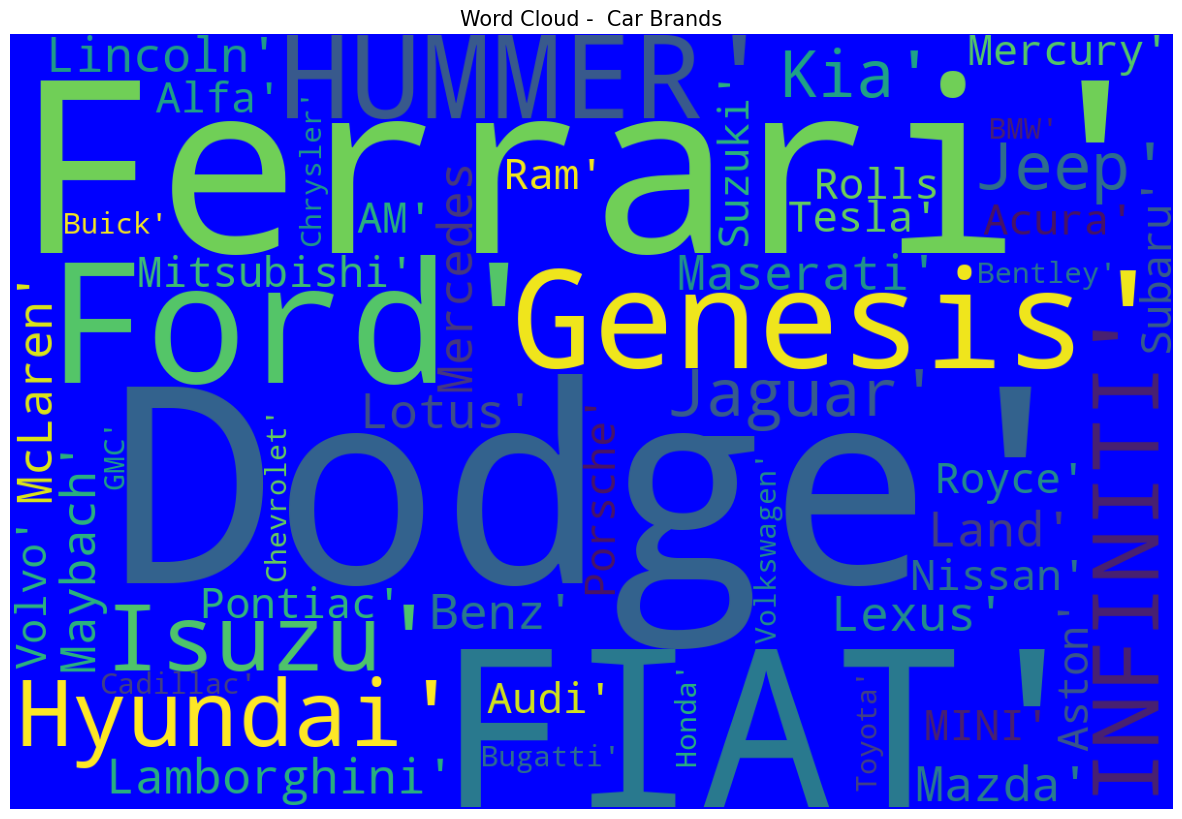

In [19]:
# let's see the words cloud for the reviews

# most popular brands

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'blue', width = 1200, height = 800).generate(str(cars_data['brand'].unique()))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud -  Car Brands', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

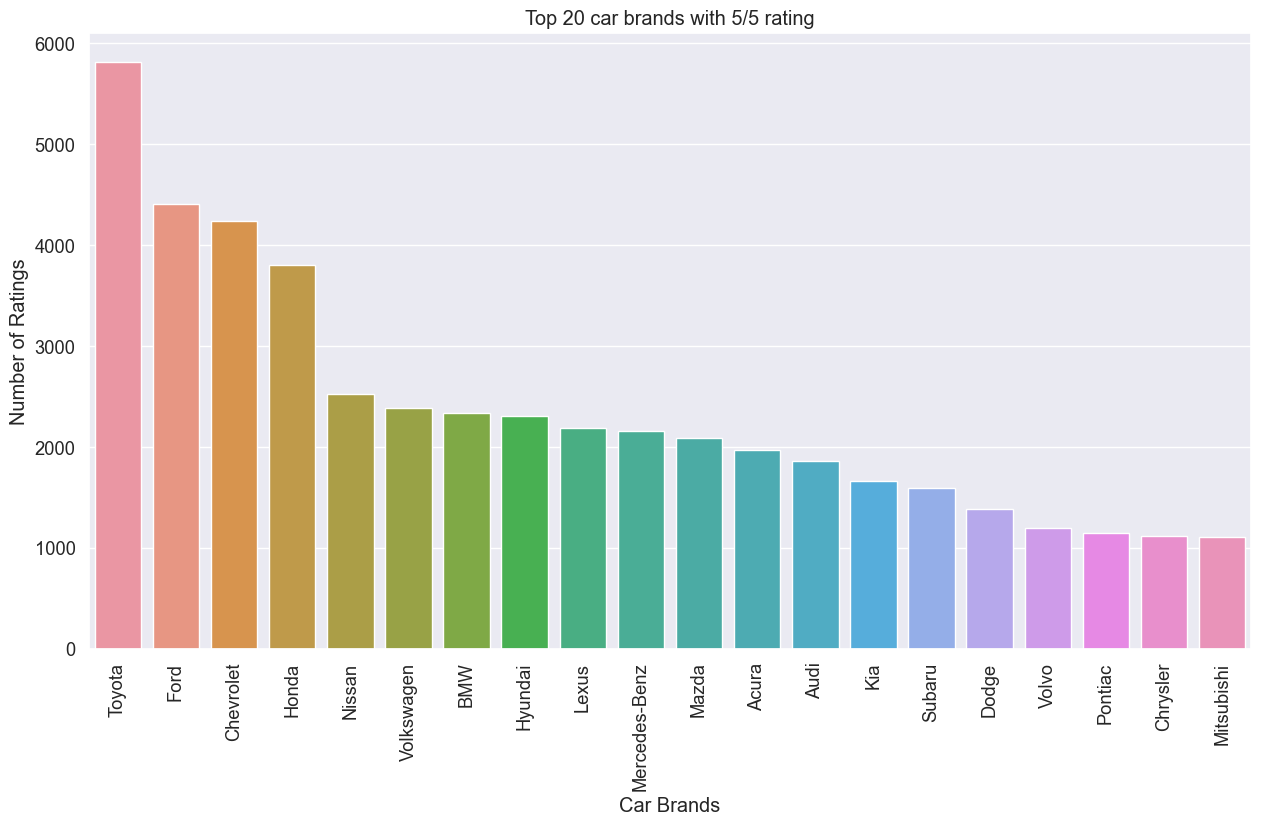

In [20]:
# This barplot shows the top 20 cars with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(cars_data.loc[cars_data.rating == 5, "brand"].value_counts())
brandname = list(rating.keys())
brand_rating = list(rating.values())

sns_rating = sns.barplot(x = brandname[0:20], y = brand_rating[0:20])

sns_rating.set_title('Top 20 car brands with 5/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Car Brands")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

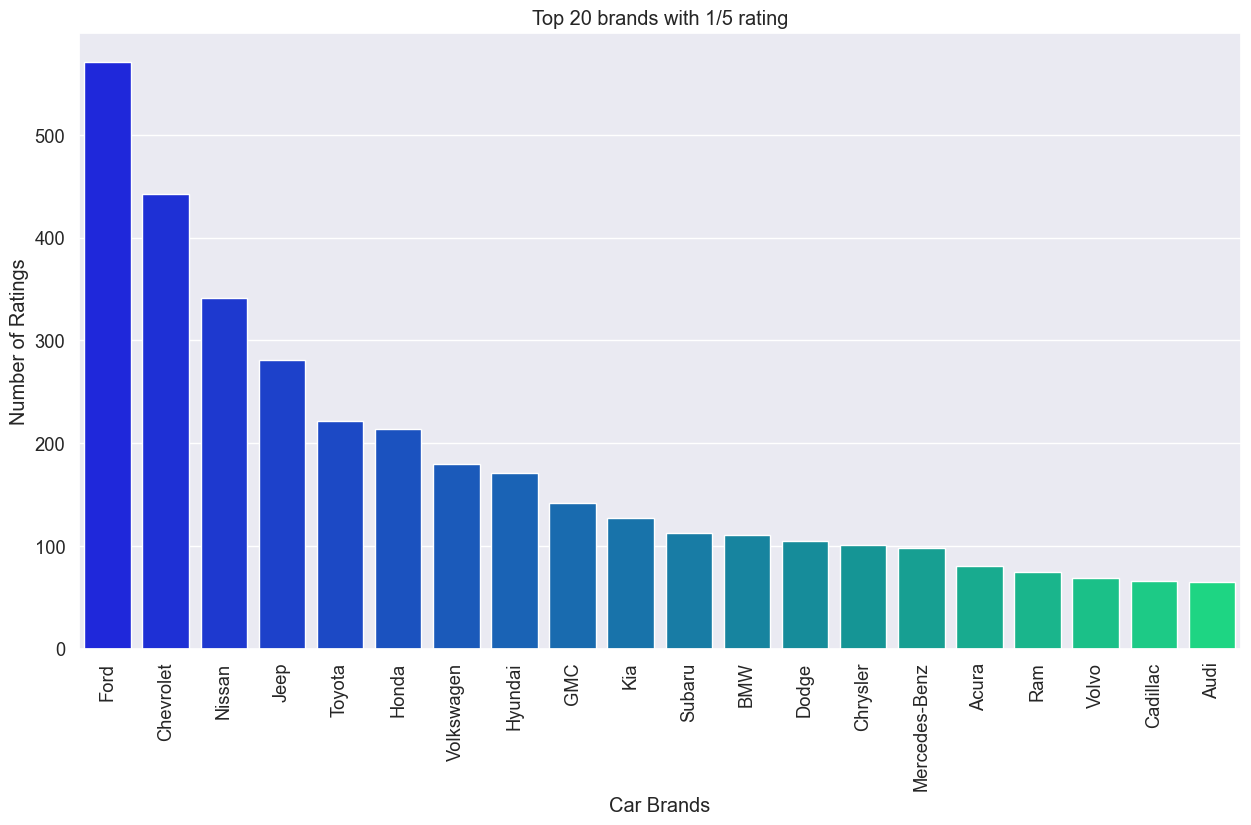

In [21]:
# This barplot shows the Top 20 cars with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(cars_data.loc[cars_data.rating == 1, "brand"].value_counts())
brandname = list(rating.keys())
brand_rating = list(rating.values())

sns_rating = sns.barplot(x = brandname[0:20], y = brand_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 brands with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Car Brands")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

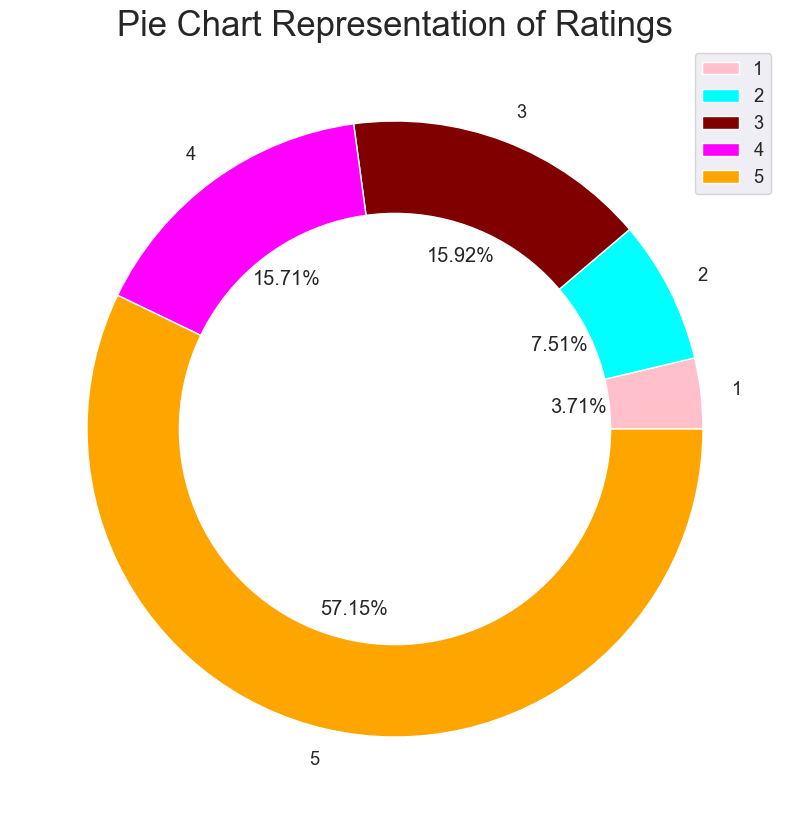

In [22]:
# Pie Chart

size = [4751,9619,20399,20123 ,73203]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange']
labels =  "1", "2", "3", "4", "5"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

# 3.Data Processing

In [23]:
# feature engineering
# let's make a new column review sentiment

cars_data.loc[(cars_data['rating'] >=2.5), 'Review_Sentiment'] = 1
cars_data.loc[(cars_data['rating'] < 2.5), 'Review_Sentiment'] = 0

cars_data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    200993
0.0     14393
Name: count, dtype: int64

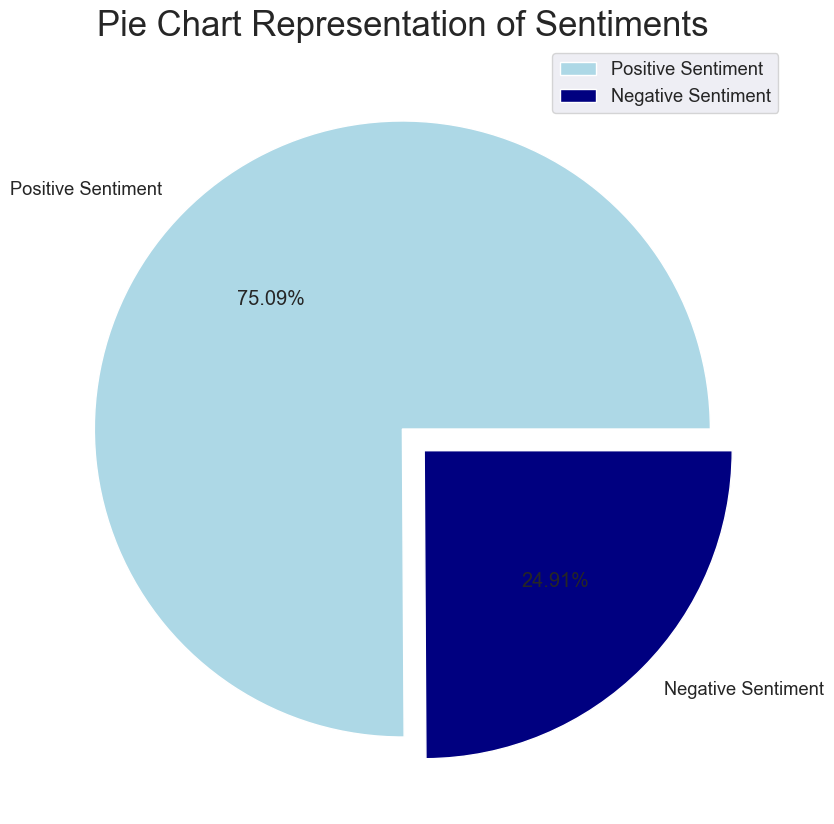

In [24]:

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

# Steps in Review Cleaning:

1. Casing - Converting all letters to lower case, removing white spaces, remove special characters
1. Removing Stopwords - removing the most common verbs like is, of, at which have no significance value in extracting the information
1. Stemming - remove tails of each word and finding the root word
1. Sentiment polarity - converting the reviews into polarized values using textblob so that they can be used in modelling
1. counts pulling - pulling unique counts and several other parameters to be used in modelling

In [25]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [26]:
cars_data['review_clean'] = review_clean(cars_data['review'])

In [29]:

# Removing the stopwords
stop_words = set(stopwords.words('english'))
cars_data['review_clean'] = cars_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [30]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
cars_data['review_clean'] = cars_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [31]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [32]:
cars_data['sentiment_clean'] = sentiment(cars_data['review_clean'])

In [33]:

#Word count in each review
cars_data['count_word']=cars_data["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
cars_data['count_unique_word']=cars_data["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
cars_data['count_letters']=cars_data["review_clean"].apply(lambda x: len(str(x)))

#Average length of the words
cars_data["mean_word_len"] = cars_data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

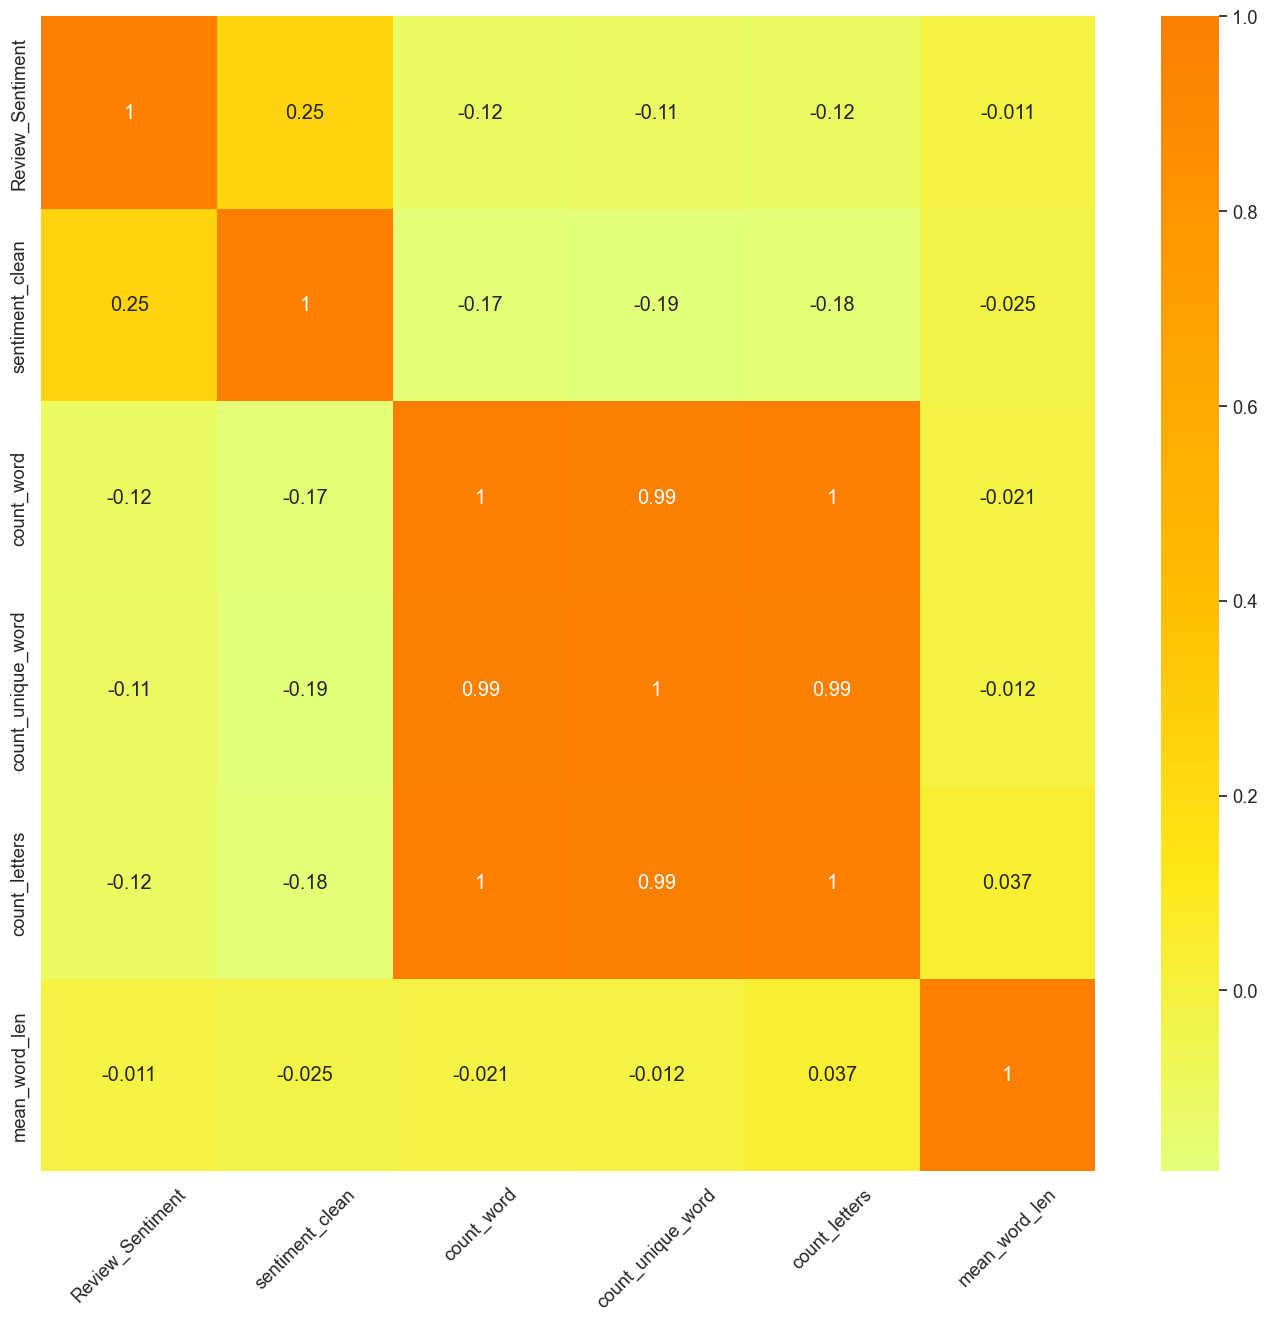

In [34]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = cars_data[['Review_Sentiment','sentiment_clean', 'count_word',
       'count_unique_word', 'count_letters',
       'mean_word_len']].corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

# 4.Model Building

## a. Model Preprocessing

In [35]:
cars_data.columns

Index(['id', 'Author_name', 'review', 'rating', 'brand', 'model', 'year',
       'Review_Sentiment', 'review_clean', 'sentiment_clean', 'count_word',
       'count_unique_word', 'count_letters', 'mean_word_len'],
      dtype='object')

In [36]:
# Label Encoding Car Name and model
label_encoded_features = {}
for feature in ['brand', 'model']:
    label_encoded_features[feature] = LabelEncoder()
    cars_data[feature] = label_encoded_features[feature].fit_transform(cars_data[feature])

In [37]:
cars_data.head()

,id,Author_name,review,rating,brand,model,year,Review_Sentiment,review_clean,sentiment_clean,count_word,count_unique_word,count_letters,mean_word_len
0,0,roadking,It's been a great delivery vehicle for my caf...,4.625,12,9319,2002,1.0,"great deliveri vehicl cafe busi good power, ec...",0.412500,34,32,210,5.205882
1,1,Mark,Bought this car as a commuter vehicle for a v...,2.125,12,9322,2002,0.0,bought car commut vehicl van pool. disappoint ...,0.008333,54,51,358,5.648148
2,2,Tom Sheer,"This van rocks its the best, lots of \nroom. ...",5.000,12,9323,2002,1.0,"van rock best, lot room. carri lot cargo mine ...",1.000000,14,12,70,4.071429
3,3,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500,12,9321,2001,1.0,great work vehicle. drive nice. lot room. easi...,0.700000,13,13,80,5.230769
4,4,VanMan,Good solid frame and suspension. Well equipp...,2.875,12,9319,2001,1.0,"good solid frame suspension. well equipped, fu...",0.168333,79,74,487,5.177215


In [38]:
cars_data.isna().any()

id                   False
Author_name          False
review               False
rating               False
brand                False
model                False
year                 False
Review_Sentiment     False
review_clean         False
sentiment_clean      False
count_word           False
count_unique_word    False
count_letters        False
mean_word_len         True
dtype: bool

In [39]:
cars_data.shape

(215386, 14)

In [40]:
cars_data=cars_data.dropna()

In [41]:
filtered_features=cars_data[['brand', 'model','year',
                   'sentiment_clean', 'count_word', 'count_unique_word', 'count_letters', 'mean_word_len']]
target=cars_data['Review_Sentiment']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(filtered_features,target,test_size=0.3,shuffle=True,random_state=42)

In [43]:
X_train.dtypes

brand                  int32
model                  int32
year                   int32
sentiment_clean      float64
count_word             int64
count_unique_word      int64
count_letters          int64
mean_word_len        float64
dtype: object

In [44]:
X_train.isna().any()

brand                False
model                False
year                 False
sentiment_clean      False
count_word           False
count_unique_word    False
count_letters        False
mean_word_len        False
dtype: bool

In [45]:
X_train.shape

(149951, 8)

## b. Initial Supervised Models

### Logistic Regression

In [46]:
lgr=LogisticRegression()
lgr_model_b=lgr.fit(X_train,y_train)

### Decision Tree Classifier

In [47]:
dt = DecisionTreeClassifier()
dt_model_b = dt.fit(X_train,y_train)

### KNearestNeighbor

In [48]:

kn = KNeighborsClassifier()
kn_model_b = kn.fit(X_train,y_train)


### Support Vector Machine

In [49]:

svm = SVC()
svm_model_b = svm.fit(X_train,y_train)


## c. Ensembling Models

### Random Forest Classifier

In [50]:
rf = RandomForestClassifier()
rf_model_c = rf.fit(X_train,y_train)


### XgBoost

In [51]:
xgb_model = xgb.XGBClassifier()
xgb_model_c=xgb_model.fit(X_train, y_train)


### Light BGM

In [52]:
lgbm = LGBMClassifier()
lgbm_model_c = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 139891, number of negative: 10060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1603
[LightGBM] [Info] Number of data points in the train set: 149951, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.932911 -> initscore=2.632296
[LightGBM] [Info] Start training from score 2.632296


## d. Neural Networks

### ANN

In [53]:
nn_model_d = Sequential([
Dense(units=64, activation='relu', input_dim=8),
Dense(units=32, activation='relu'),
Dense(units=1, activation='sigmoid')])


In [54]:
nn_model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
nn_model_d.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


4686/4686 [==============================] - 20s 4ms/step - loss: 5.3532 - accuracy: 0.8767 - val_loss: 2.3359 - val_accuracy: 0.9218
Epoch 2/10
4686/4686 [==============================] - 19s 4ms/step - loss: 1.9086 - accuracy: 0.8812 - val_loss: 1.1694 - val_accuracy: 0.9318
Epoch 3/10
4686/4686 [==============================] - 21s 4ms/step - loss: 0.8690 - accuracy: 0.8947 - val_loss: 1.0357 - val_accuracy: 0.9329
Epoch 4/10
4686/4686 [==============================] - 19s 4ms/step - loss: 0.4826 - accuracy: 0.9098 - val_loss: 0.3446 - val_accuracy: 0.9328
Epoch 5/10
4686/4686 [==============================] - 19s 4ms/step - loss: 0.4039 - accuracy: 0.9170 - val_loss: 0.2390 - val_accuracy: 0.9323
Epoch 6/10
4686/4686 [==============================] - 19s 4ms/step - loss: 0.3220 - accuracy: 0.9225 - val_loss: 0.2485 - val_accuracy: 0.9318
Epoch 7/10
4686/4686 [==============================] - 19s 4ms/step - loss: 0.2737 - accuracy: 0.9280 - val_loss: 0.2461 - val_

# 5.Model Evaluation

In [56]:
def model_evaluator(y_test,y_pred,classes):
    cm = metrics.confusion_matrix(y_test,y_pred)

    plt.figure(figsize=(6,1))


    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)




    disp.plot(cmap='Blues', values_format='d')


    plt.title('Confusion Matrix')


    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.xticks(rotation=90)


    plt.show()
    acc=round(metrics.accuracy_score(y_test,y_pred)*100,2)
    print("Model Accuracy:",acc,"%")

## b.Supervised Models

### Logistic Regression

<Figure size 600x100 with 0 Axes>

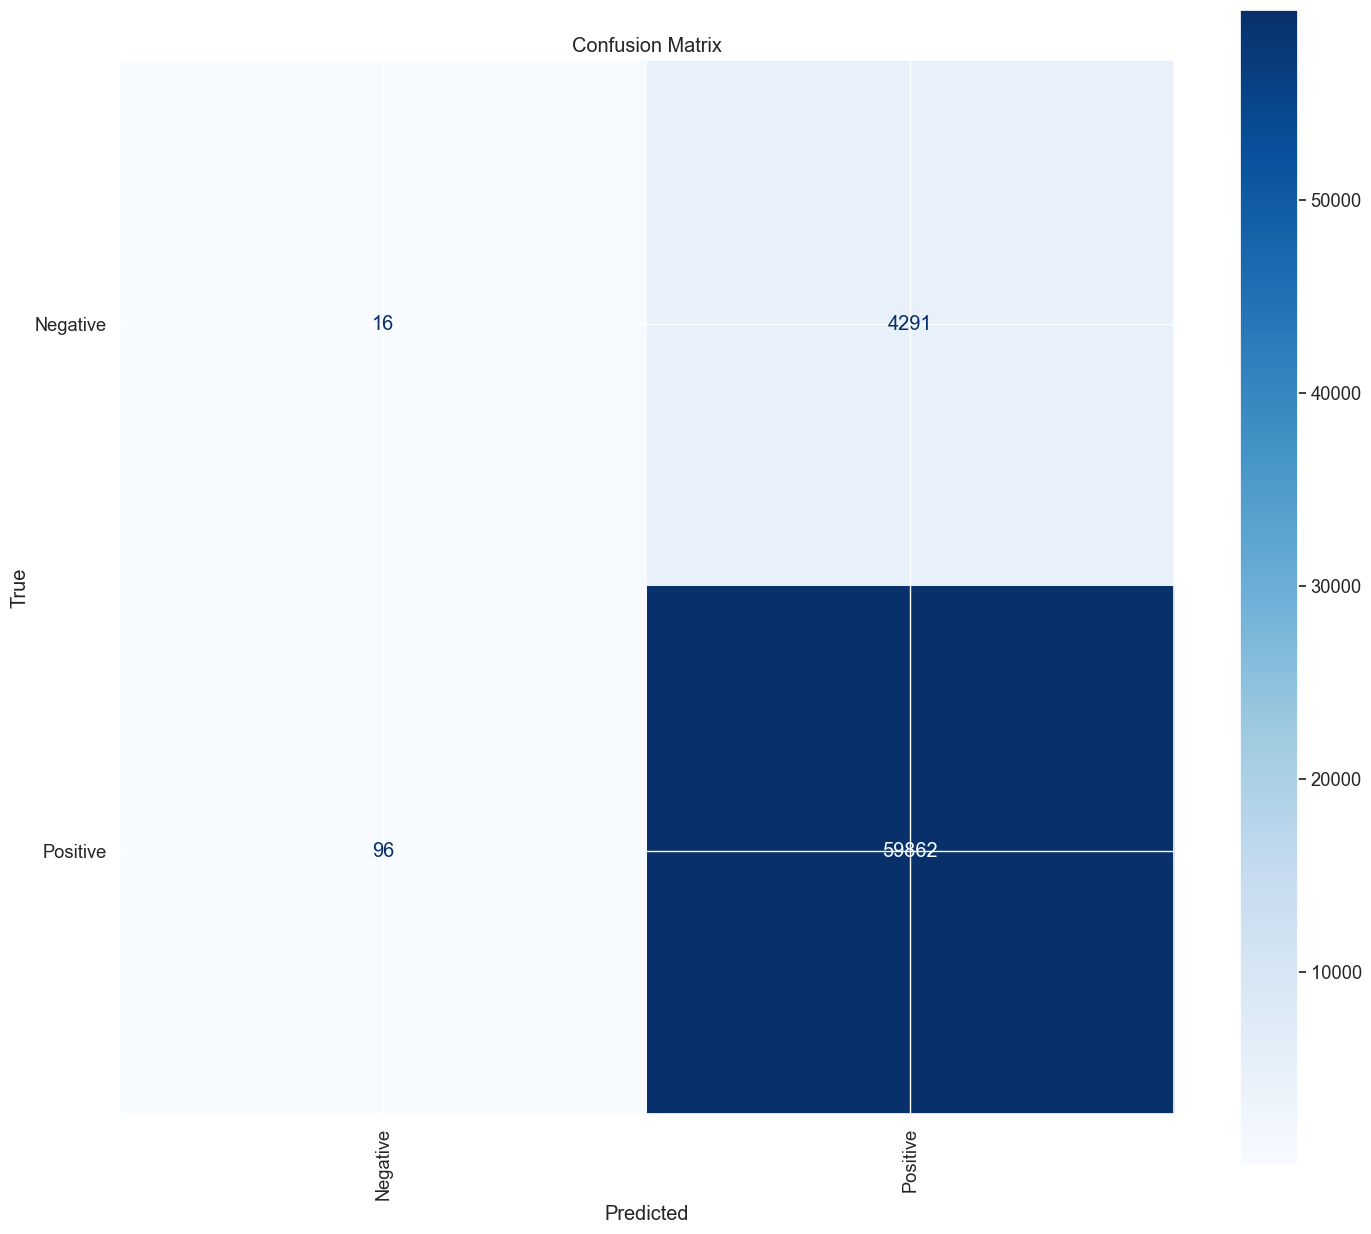

Model Accuracy: 93.17 %


In [57]:
model_evaluator(y_test,lgr_model_b.predict(X_test),["Negative","Positive"])

### Decision Tree Classifier

<Figure size 600x100 with 0 Axes>

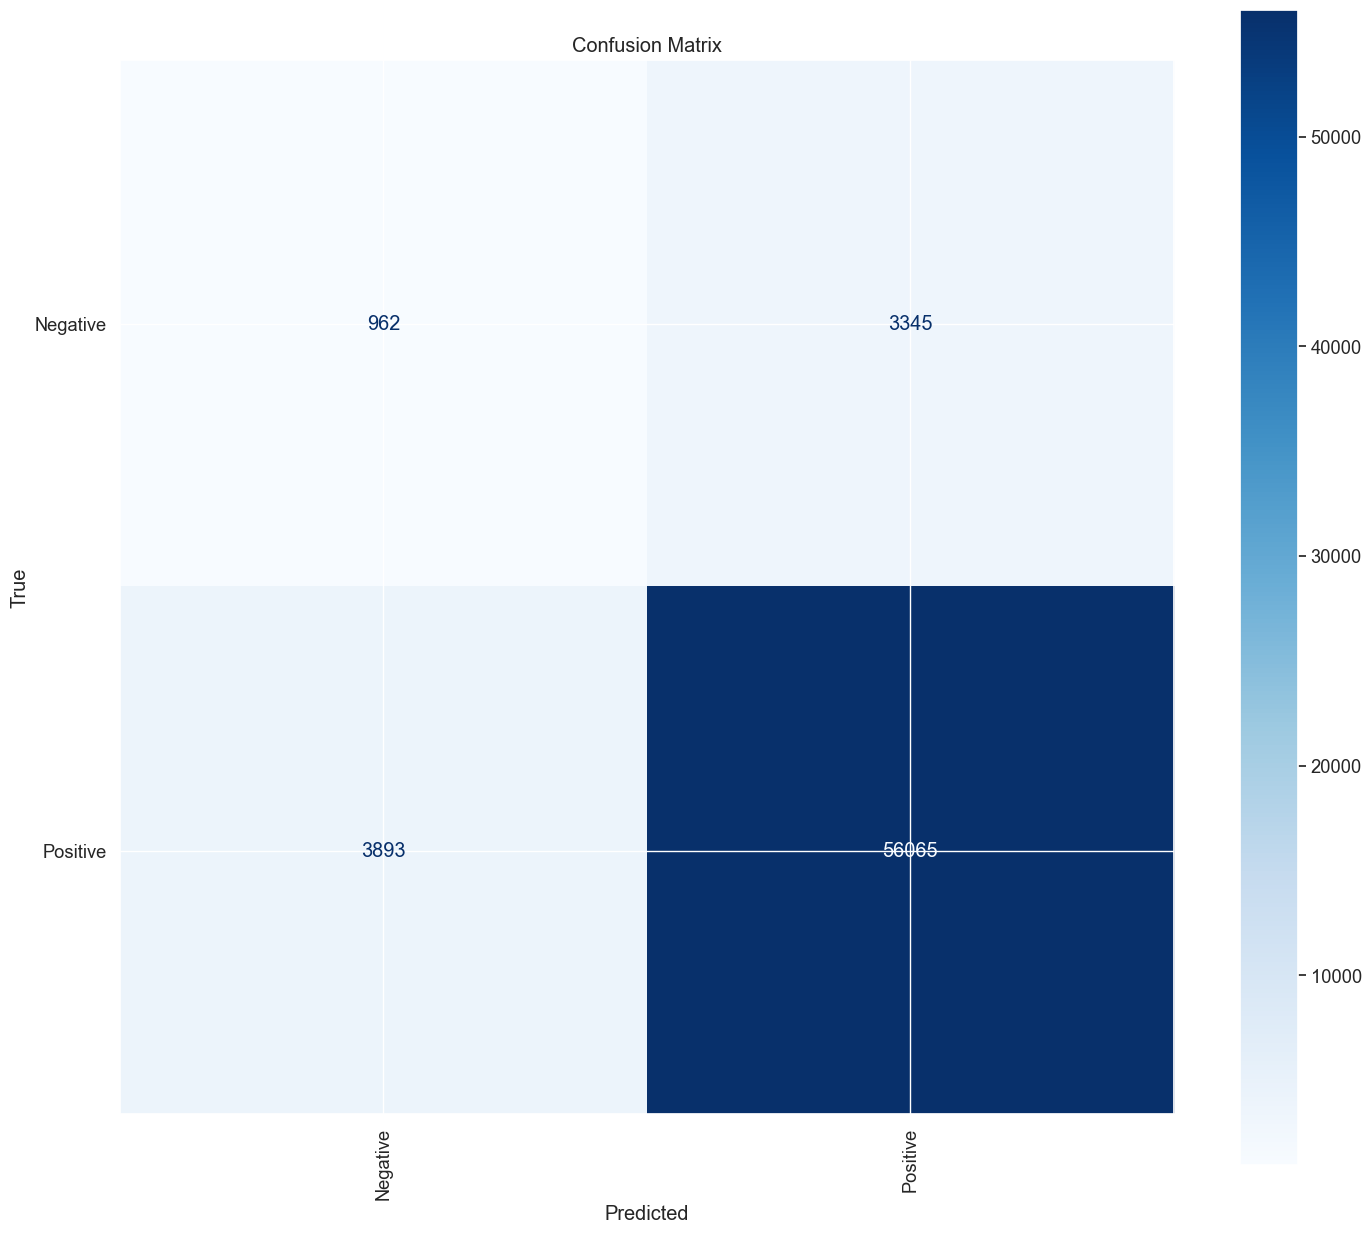

Model Accuracy: 88.74 %


In [58]:
model_evaluator(y_test,dt_model_b.predict(X_test),["Negative","Positive"])

### KNearestNeighbor

<Figure size 600x100 with 0 Axes>

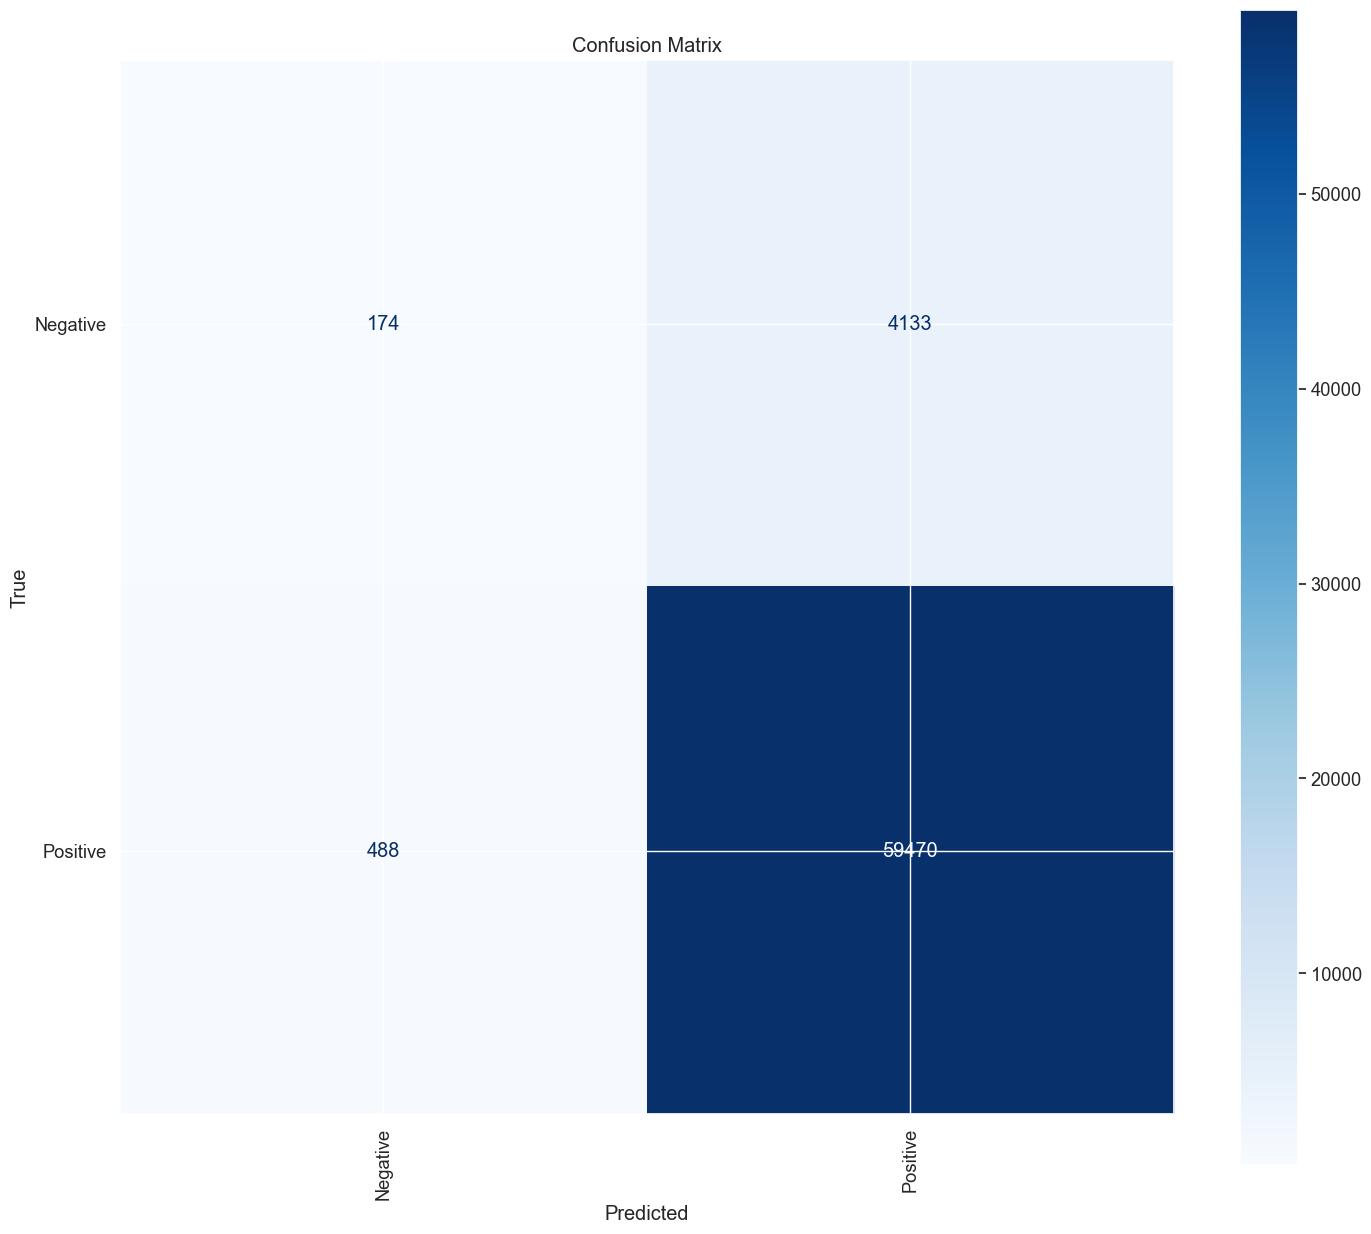

Model Accuracy: 92.81 %


In [59]:
model_evaluator(y_test,kn_model_b.predict(X_test),["Negative","Positive"])

### SVM

<Figure size 600x100 with 0 Axes>

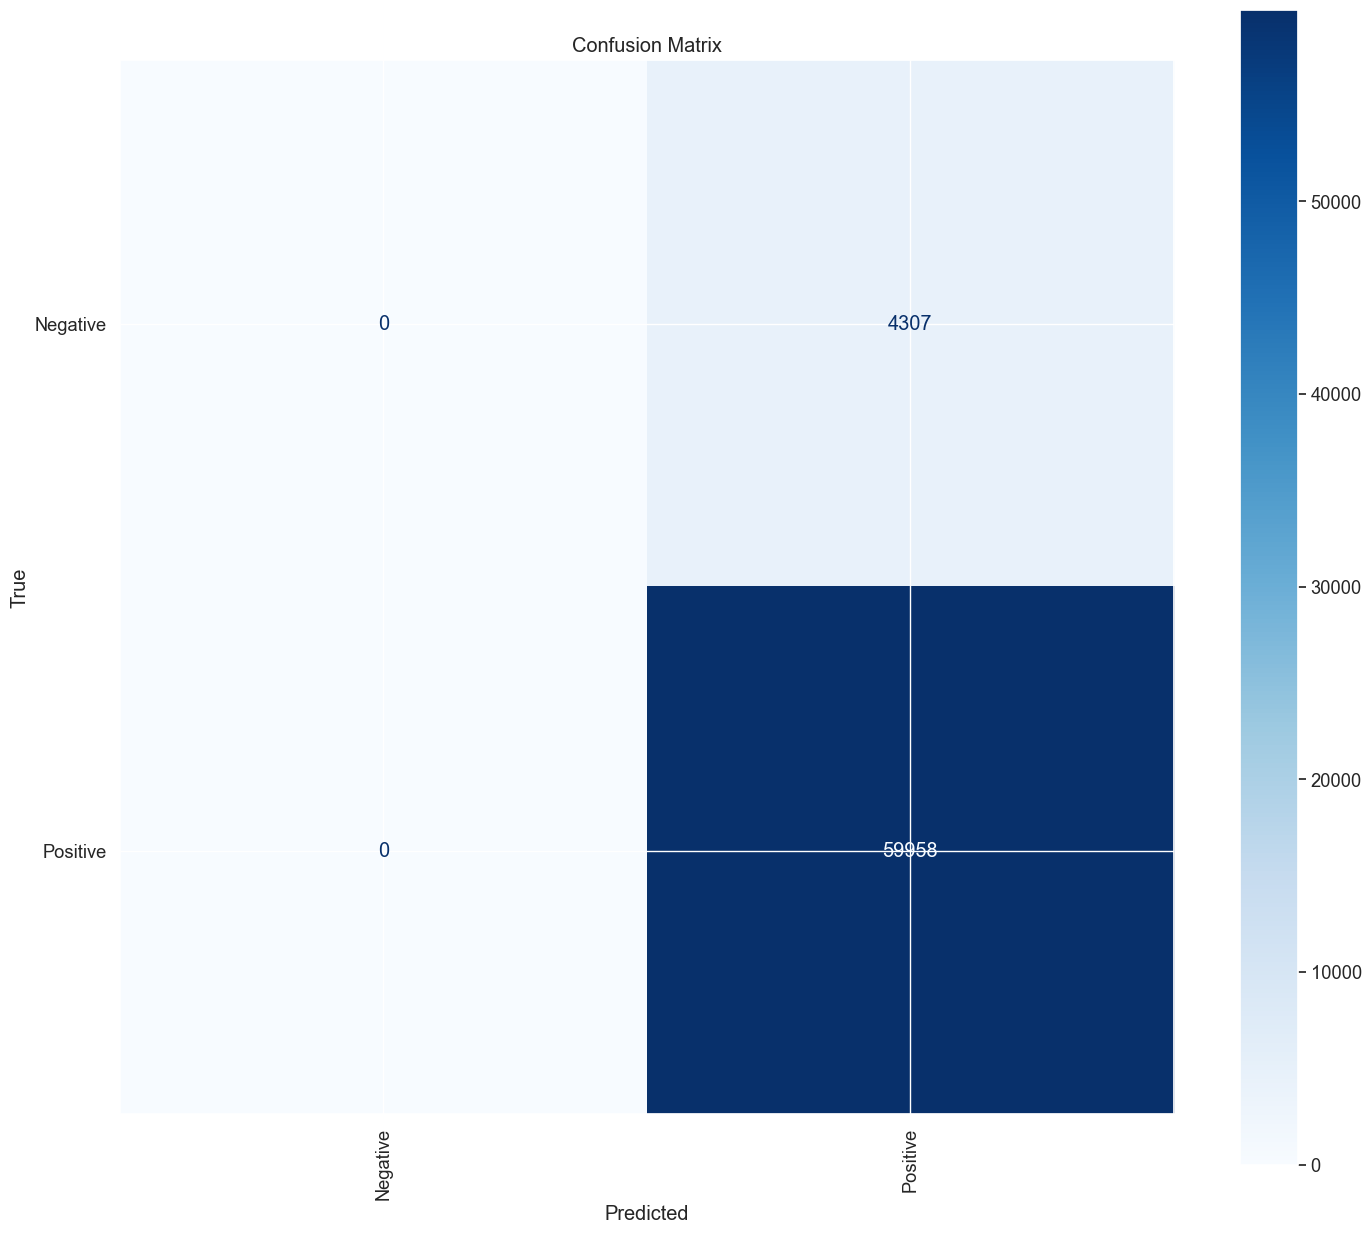

Model Accuracy: 93.3 %


In [60]:
model_evaluator(y_test,svm_model_b.predict(X_test),["Negative","Positive"])

## c. Ensembling Models

### Random Forest Classifier

<Figure size 600x100 with 0 Axes>

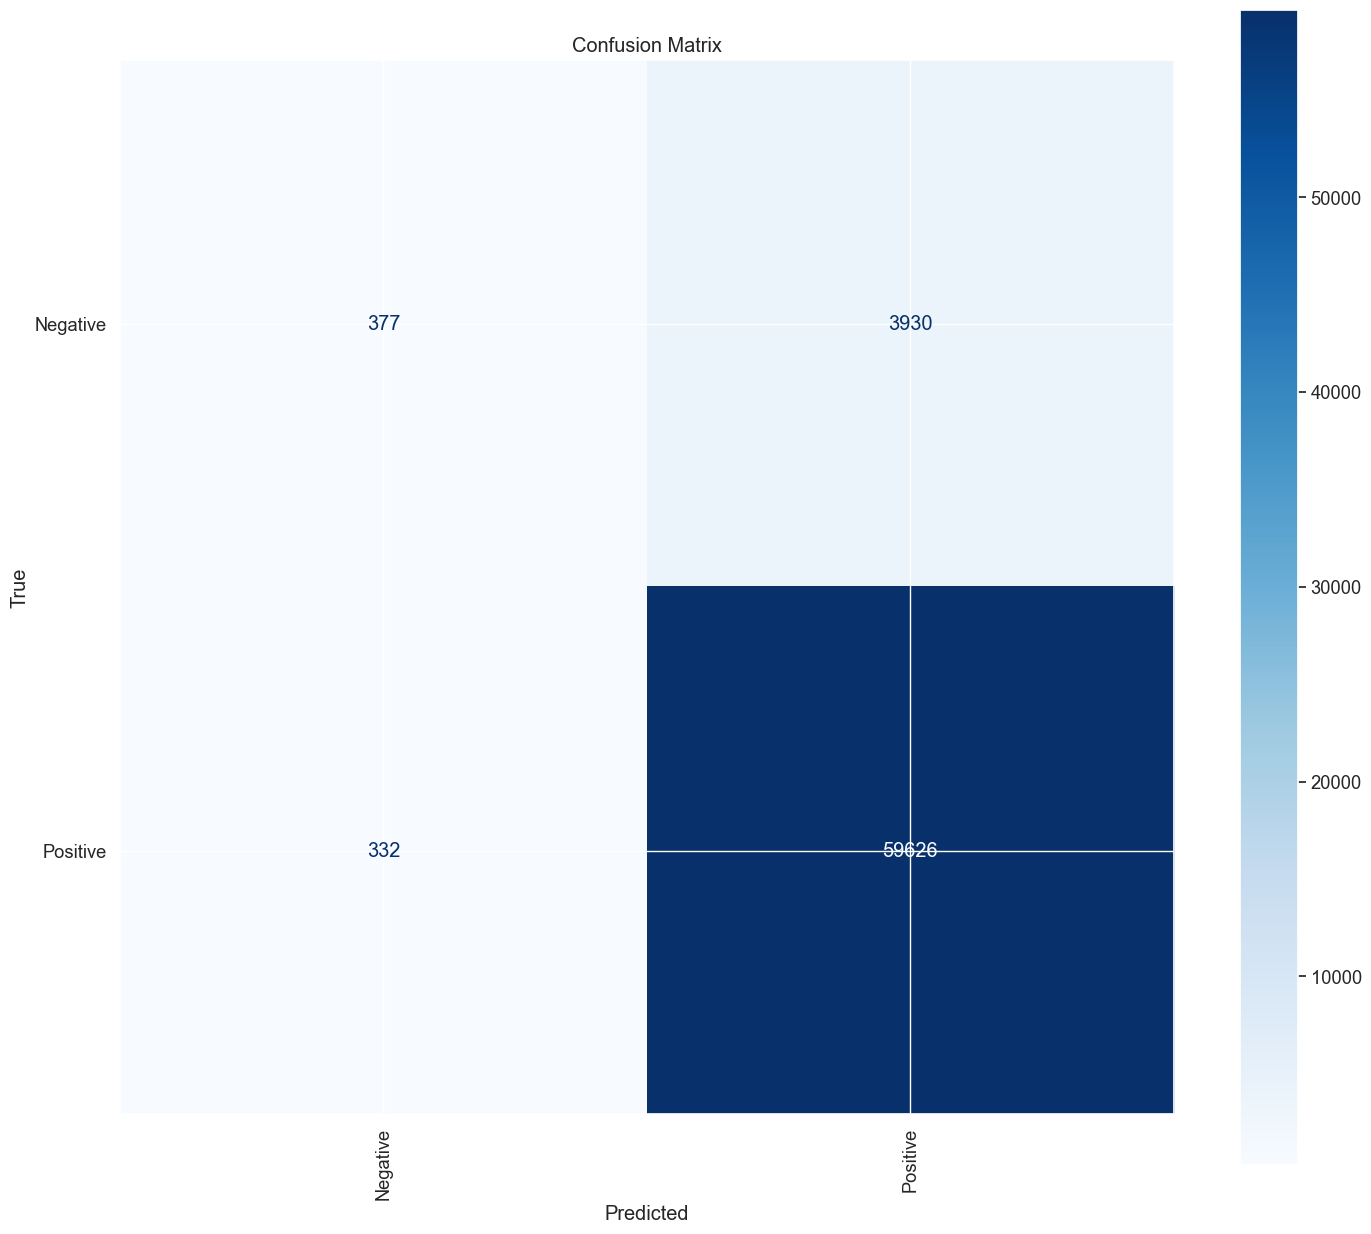

Model Accuracy: 93.37 %


In [61]:
model_evaluator(y_test,rf_model_c.predict(X_test),["Negative","Positive"])

### XGboost

<Figure size 600x100 with 0 Axes>

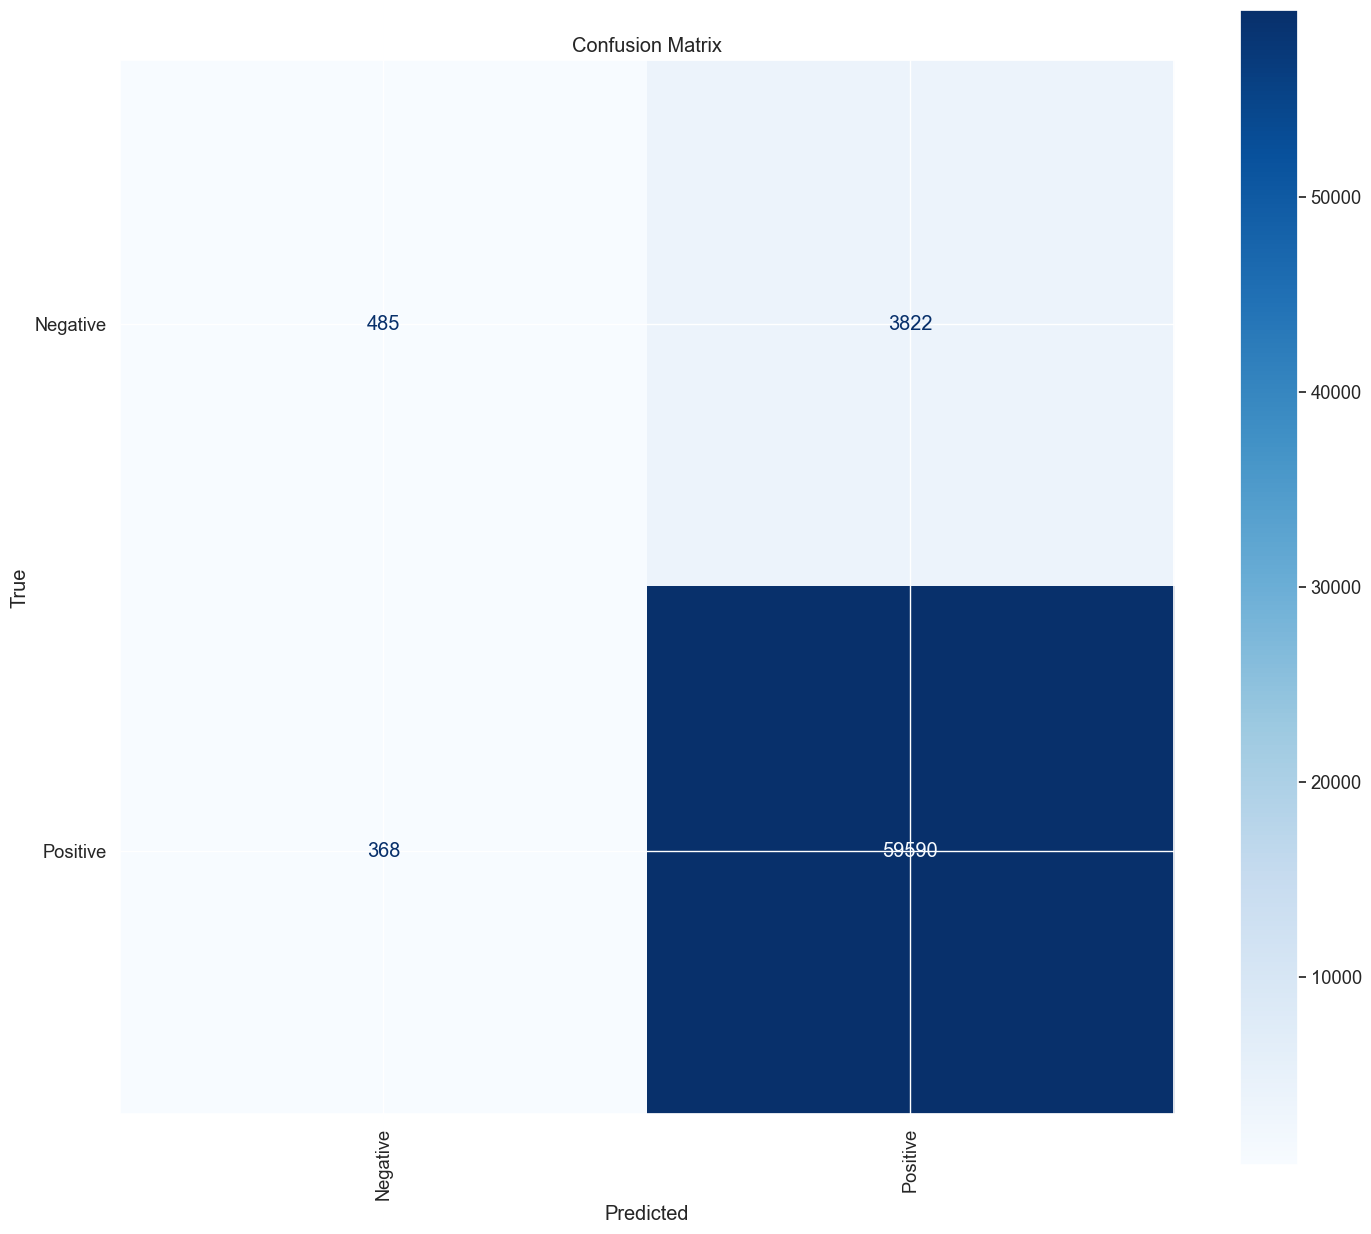

Model Accuracy: 93.48 %


In [62]:
model_evaluator(y_test,xgb_model_c.predict(X_test),["Negative","Positive"])

### Light BGM

<Figure size 600x100 with 0 Axes>

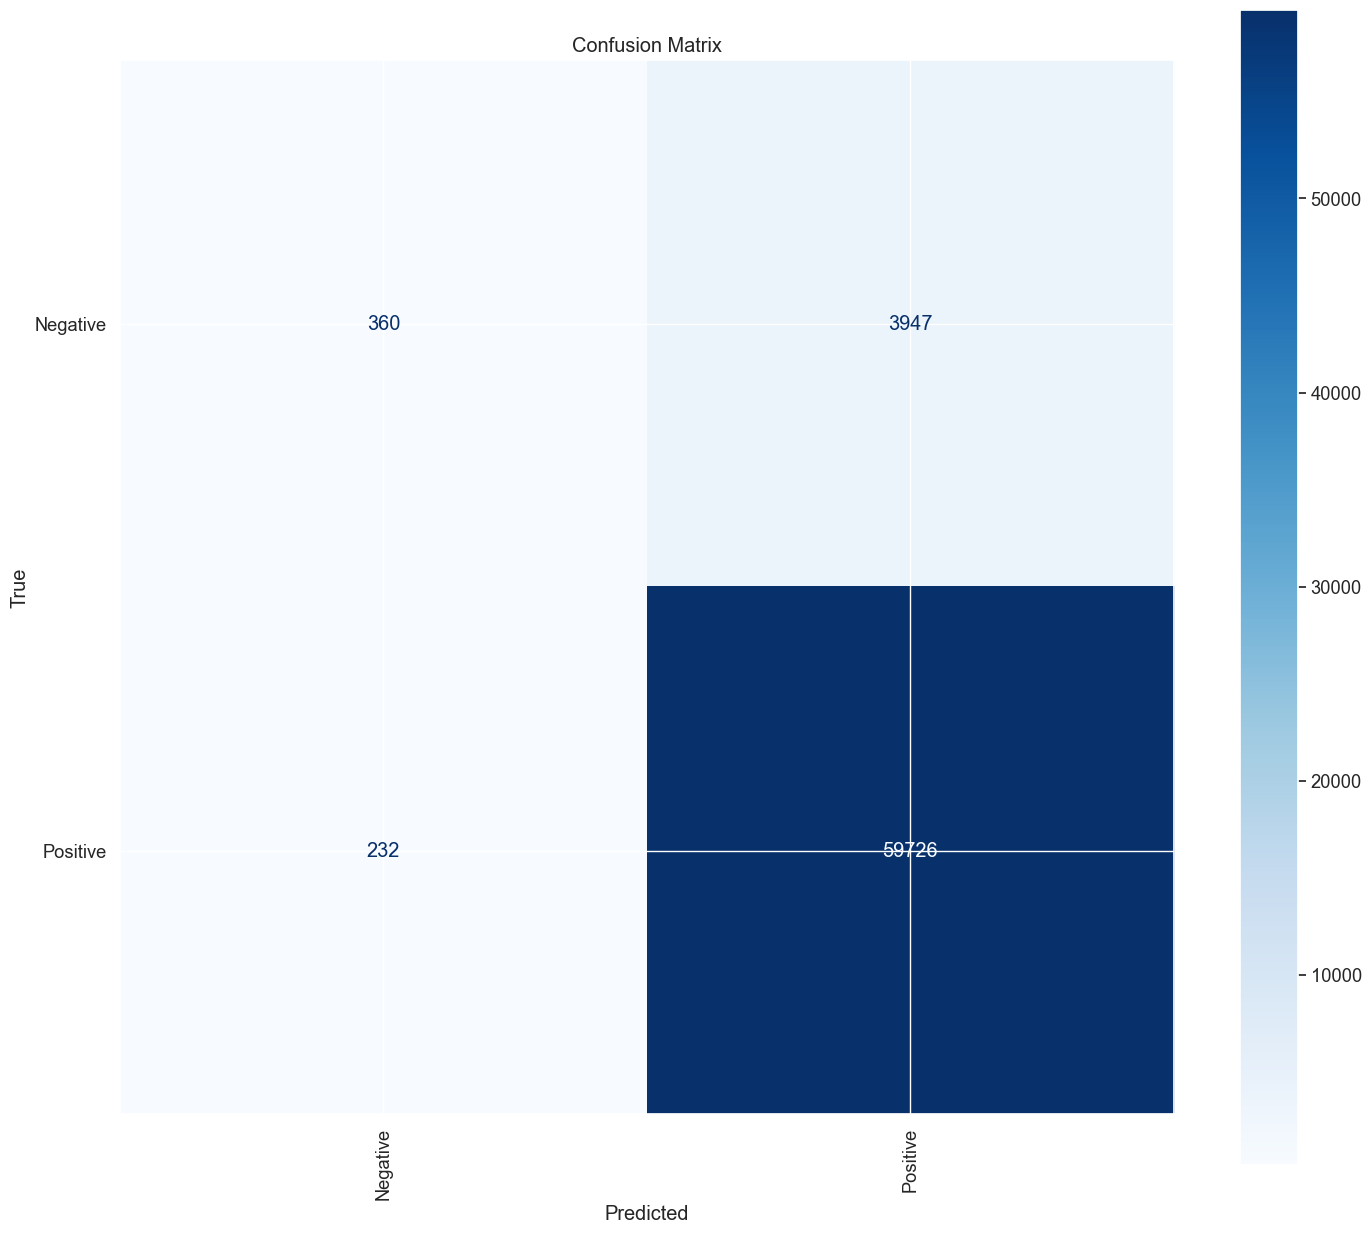

Model Accuracy: 93.5 %


In [63]:
model_evaluator(y_test,lgbm_model_c.predict(X_test),["Negative","Positive"])

## d. Neural Networks

2009/2009 [==============================] - 4s 2ms/step


<Figure size 600x100 with 0 Axes>

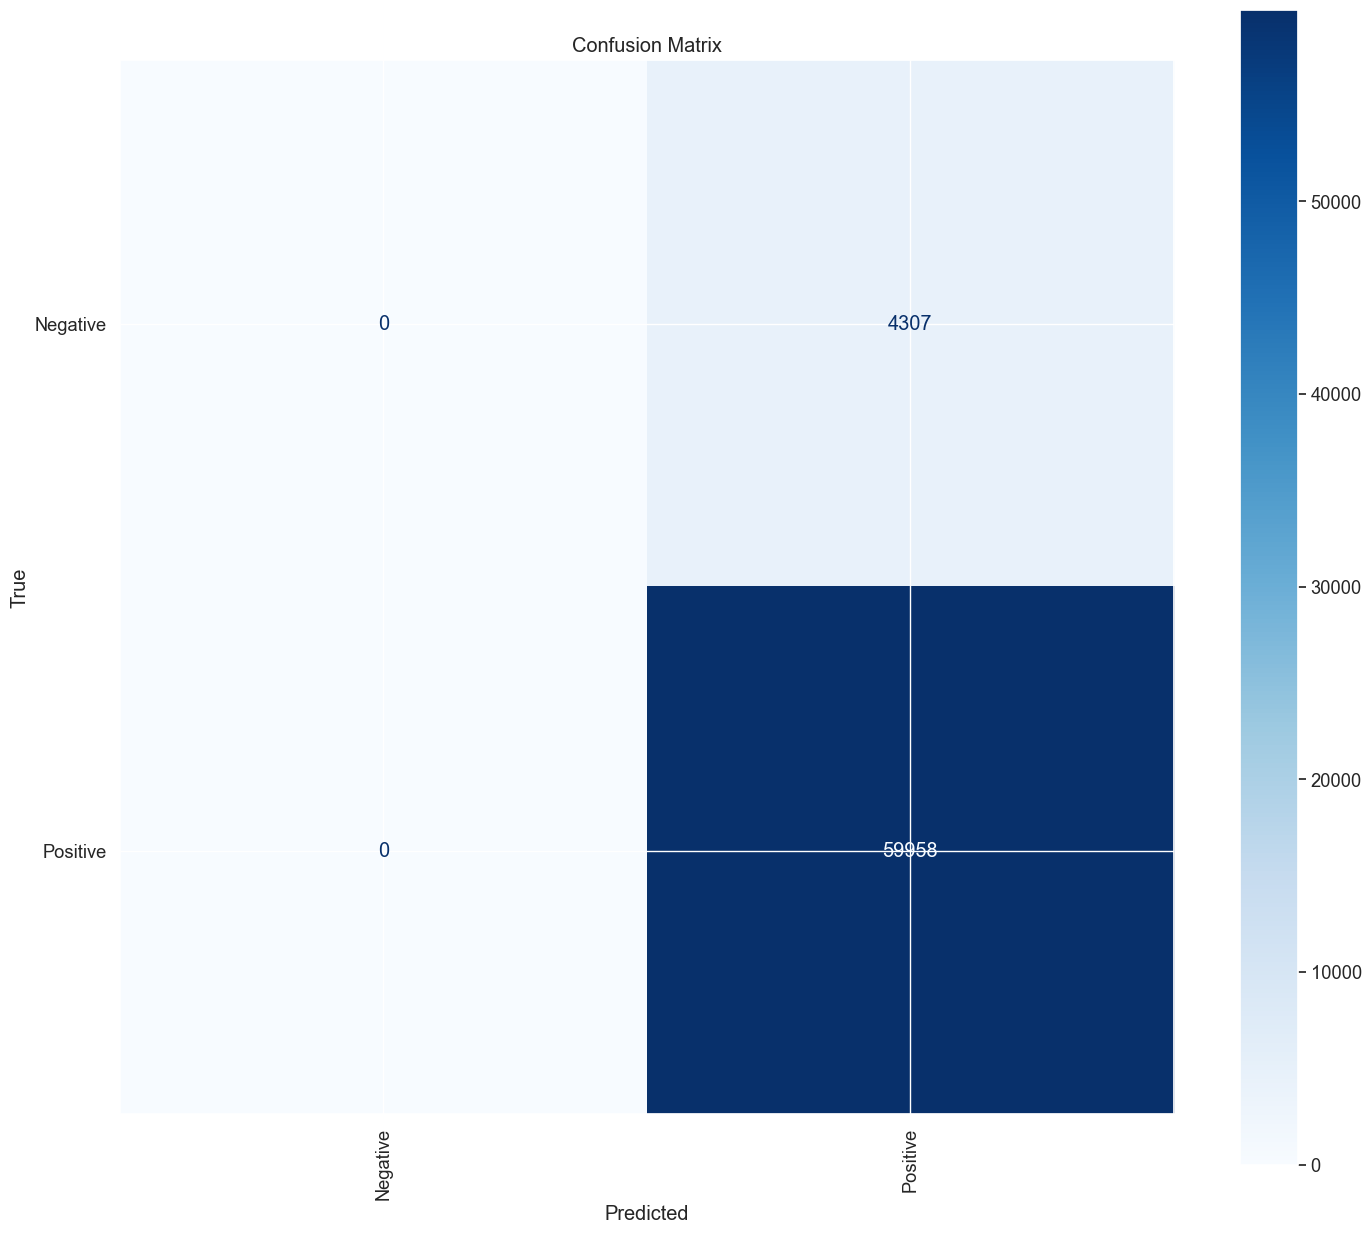

Model Accuracy: 93.3 %


In [64]:
model_evaluator(y_test,(nn_model_d.predict(X_test) > 0.5).astype(int),["Negative","Positive"])

# 6.Results

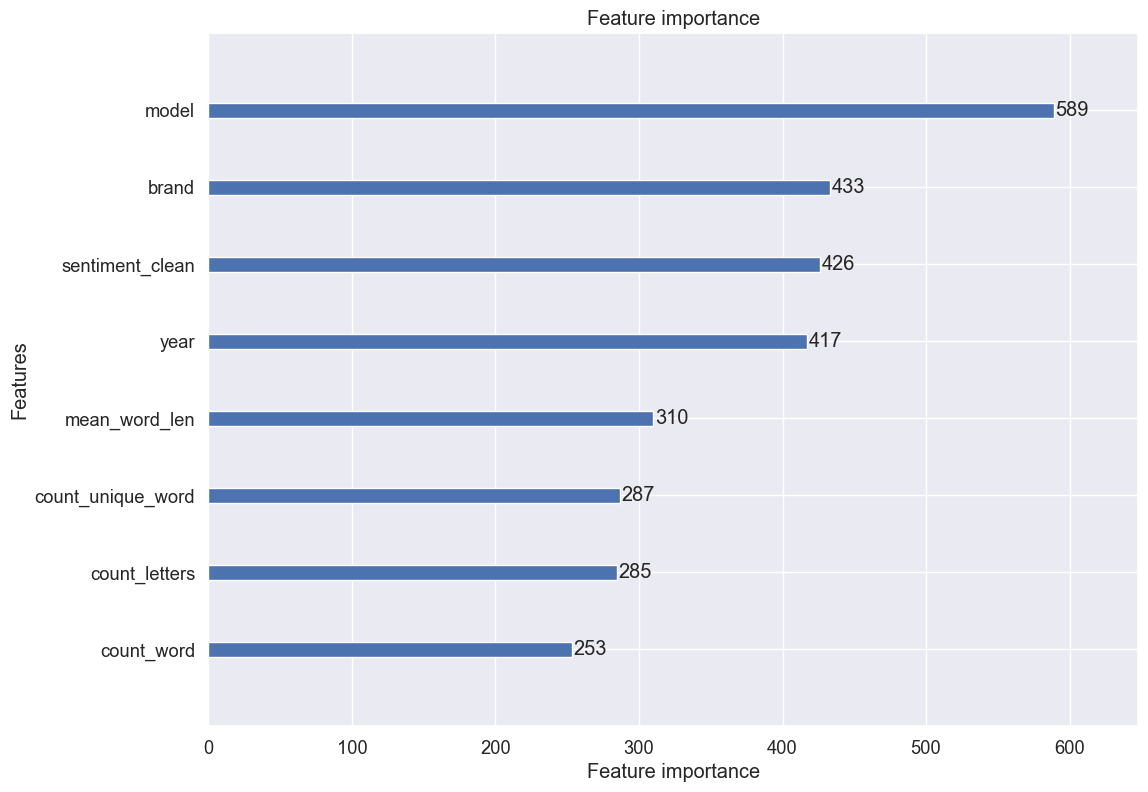

In [65]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(lgbm_model_c);

# Demo

In [66]:
random_sample_df=pd.DataFrame([ {
    'brand': 'Toyota',
    'model': 'Camry',
    'year': 2016,
    'sentiment_clean': "My experience with the 2016 Toyota Ca0mry has been wonderful. The engine is very strong and the car's overall reliability is unmatched compared with other brands. The car is approximately 6 years old and over 51 k miles while it still drives like day 1 since I've had it. It is made bulletproof in my opinion with really low maintenance cost. I have only done regular maintenance of the vehicle since I bought it and it has been solid for over 6 years. I look forward to driving it for many more years to come. I would definitely recommend buying this vehicle to everyone."

}])
random_sample_df['sentiment_clean'] = review_clean(random_sample_df['sentiment_clean'])
random_sample_df['sentiment_clean'] = random_sample_df['sentiment_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
random_sample_df['sentiment_clean'] = random_sample_df['sentiment_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
random_sample_df['sentiment_clean'] = sentiment(random_sample_df['sentiment_clean'])

#Word count in each review
random_sample_df['count_word']=random_sample_df["sentiment_clean"].apply(lambda x: len(str(x).split()))

#Unique word count
random_sample_df['count_unique_word']=random_sample_df["sentiment_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
random_sample_df['count_letters']=random_sample_df["sentiment_clean"].apply(lambda x: len(str(x)))

#Average length of the words
random_sample_df["mean_word_len"] = random_sample_df["sentiment_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


categorical_columns = ['brand', 'model']  # Assuming these are the categorical columns

for feature in ['brand', 'model']:
    #label_encoded_features[feature] = LabelEncoder()
    random_sample_df[feature] = label_encoded_features[feature].fit_transform(random_sample_df[feature])

In [67]:
prediction = lgbm_model_c.predict(random_sample_df)

sentiment_mapping = {1: 'Positive', 0: 'Negative'}
mapped_prediction = sentiment_mapping[prediction[0]]


print("Predicted sentiment:", mapped_prediction)

Predicted sentiment: Positive
